In [2]:
# problem # 1 - clustering

import pandas as pd
import numpy as np


# function for generateing noisy cluster

def generate_cluster(num_points, radius, noise_mean, noise_sd):
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(angles) + np.random.normal(noise_mean, noise_sd, num_points)
    y = radius * np.sin(angles) + np.random.normal(noise_mean, noise_sd, num_points)
    return pd.DataFrame({'x': x, 'y': y})

# generate inner and outer clusers
inner_cluster = generate_cluster(200, 2, 0, 0.19)
outer_cluster = generate_cluster(200, 4, 0, 0.19)

# combine the clusters
clusters = pd.concat([inner_cluster, outer_cluster], ignore_index=True)

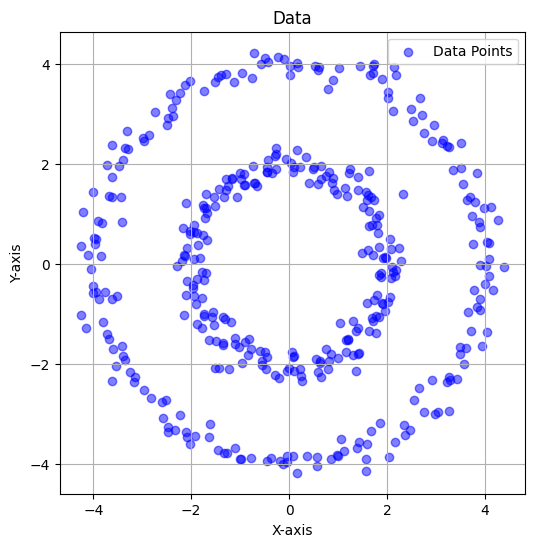

In [ ]:
# plot the combined clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(clusters['x'], clusters['y'], c='blue', alpha=0.5, label='Data Points')
plt.title('Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()


plt.show()


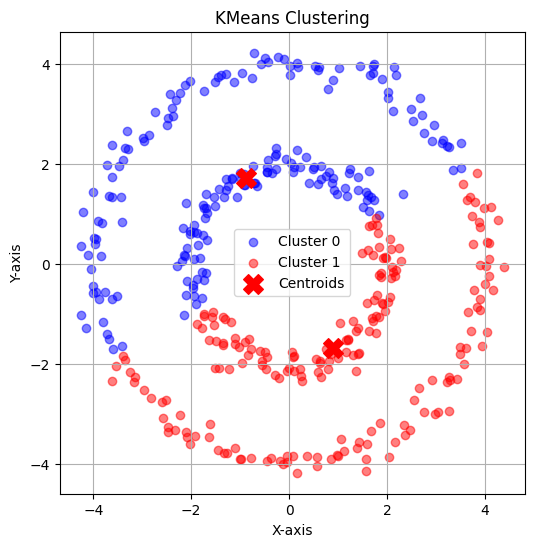

In [5]:
# perform clustering using kmeans on the COMBINED clusters

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, random_state=0)
km.fit(clusters)
clusters['cluster'] = km.labels_

cluster_colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(6, 6))
for cluster_id in sorted(clusters['cluster'].unique()):
    cluster_data = clusters[clusters['cluster'] == cluster_id]
    plt.scatter(cluster_data['x'], cluster_data['y'], 
                color=cluster_colors.get(cluster_id, 'gray'), 
                label=f'Cluster {cluster_id}', 
                alpha=0.5)

# plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()




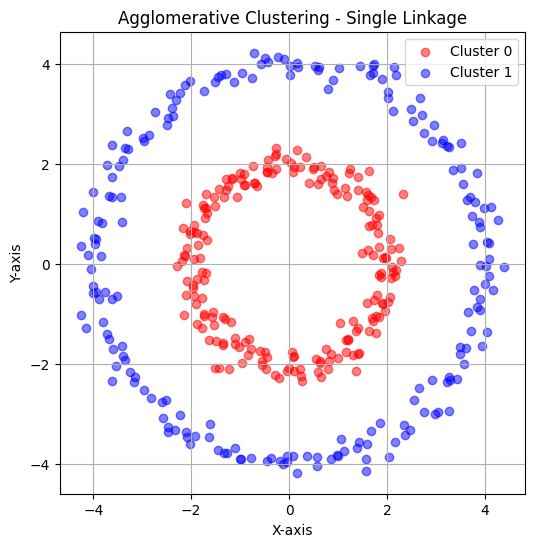

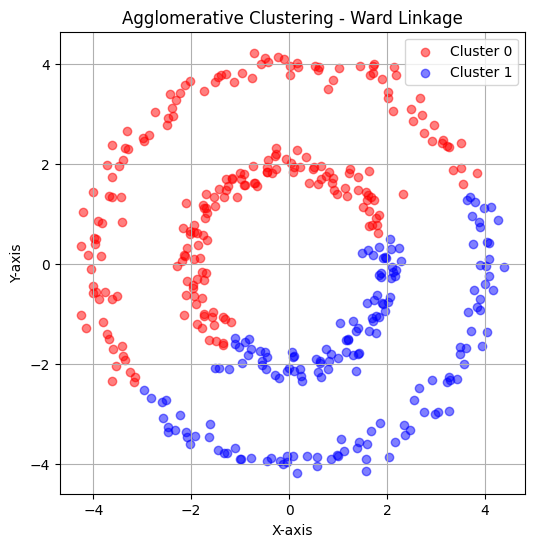

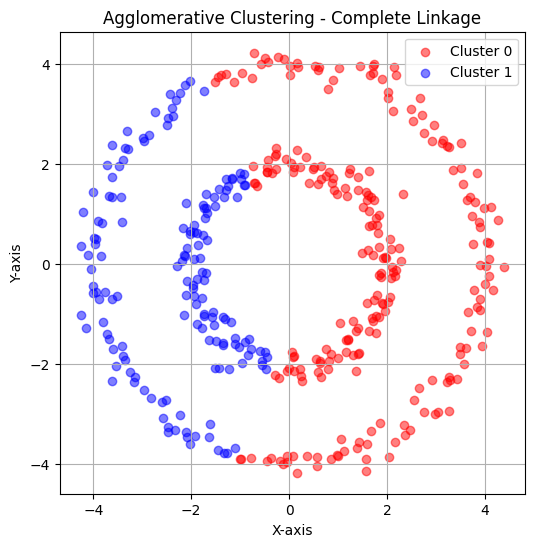

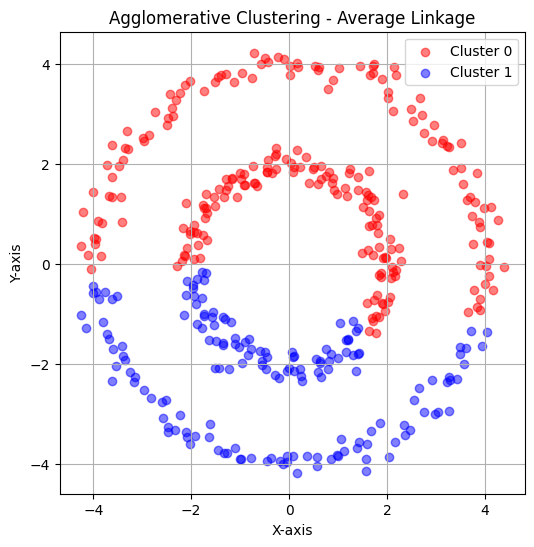

In [6]:
# perform clustering using hiearchial clustering on the COMBINED clusters

from sklearn.cluster import AgglomerativeClustering

# different linkage methods
linkage_methods = ['single', 'ward', 'complete', 'average']
results = {}

for method in linkage_methods:
    ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage=method)
    clusters['ac_cluster'] = ac.fit_predict(clusters[['x', 'y']])
    results[method] = clusters.copy()


cluster_colors = {0: 'red', 1: 'blue'}
# plot each method's results
for method, result in results.items():
    plt.figure(figsize=(6, 6))
    
    for cluster_id in sorted(result['ac_cluster'].unique()):
        cluster_data = result[result['ac_cluster'] == cluster_id]
        plt.scatter(cluster_data['x'], cluster_data['y'], 
                    color=cluster_colors[cluster_id], 
                    label=f'Cluster {cluster_id}', 
                    alpha=0.5)

    plt.title(f'Agglomerative Clustering - {method.capitalize()} Linkage')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid()
    plt.show()

# so clearly single linkage is the winner here
